# Heat Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The **heat equation** (or **diffusion equation**) is given by

$$
\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2} \ , \ \ 0 \leq x \leq L \ , \ \ t \geq 0 \ , \ \ \alpha \in \mathbb{R}
$$

## Initial and Boundary Conditions

The **initial condition** is a function $f(x)$ which determines the solution $u(x,0) = f(x)$ at time $t=0$.

There are 2 types of boundary conditions for the heat equation:

**Dirichlet boundary conditions** specify the values of the solution at the endpoints:

$$
u(0,t) = T_0 \ \ \ \text{and} \ \ \ u(L,t) = T_L
$$

**Neumann boundary conditions** specify the values of the derivative of the solution at the endpoints:

$$
u_x(0,t) = Q_0 \ \ \ \text{and} \ \ \ u_x(L,t) = Q_L
$$

## Discretization

Choose the number of steps $N$ in the $x$ direction and the number of steps $K$ in the $t$ direction. These choices determine the step sizes $\Delta x$ and $\Delta t$, and create a grid of points:

$$
\begin{align}
x_n &= n \Delta x \ , \ \ n = 0,1, \dots, N \ , \ \ \Delta x = \frac{L}{N} \\
t_k &= k \Delta t \ , \ \ k = 0,1, \dots, K \ , \ \ \Delta t = \frac{t_f}{K}
\end{align}
$$

Here we have chosen some final time value $t_f$ so that the domain of the solution $u(x,t)$ is a finite rectangle $[0,L] \times [0,t_f]$. The goal of a finite difference method is to compute the matrix

$$
U = [u_{n,k}]
$$

which gives approximations of the solution $u(x,t)$ at the grid points:

$$
u_{n,k} \approx u(x_n,t_k) = u(n \Delta x,k \Delta t)
$$

where $x_0 = 0$, $x_N = L$, $t_0 = 0$ and $t_M = t_f$.

## Forward Time Central Space

Apply the forward difference formula for $u_t$ at position $x_n$ and time $t_k$

$$
\begin{align*}
u_t(x_n,t_k) &= \frac{u(x_n,t_{k+1}) - u(x_n,t_k)}{\Delta t} + O(\Delta t) \\
&= \frac{u_{n,k+1} - u_{n,k}}{\Delta t} + O(\Delta t)
\end{align*}
$$

Apply the central difference formula for $u_{xx}$ at position $x_n$ and time $t_k$

$$
\begin{align*}
u_{xx}(x_n,t_k) &= \frac{u(x_{n+1},t_k) - 2u(x_n,t_k) + u(x_{n-1},t_k)}{\Delta x^2} + O(\Delta x^2) \\
&= \frac{u_{n+1,k} - 2u_{n,k} + u_{n-1,k}}{\Delta x^2} + O(\Delta x^2)
\end{align*}
$$

Plug the formulas into the heat equation at position $x_n$ and time $t_k$

$$
\begin{align*}
u_t(x_n,t_k) &= \alpha^2 u_{xx}(x_n,t_k) \\
\frac{u_{n,k+1} - u_{n,k}}{\Delta t}
&=
\alpha^2 \left( \frac{u_{n+1,k} - 2u_{n,k} + u_{n-1,k}}{\Delta x^2} \right)
\end{align*}
$$

Rearrange to solve for $u_{n,k+1}$

$$
u_{n,k+1} = r u_{n-1,k} + (1 - 2r) u_{n,k} + r u_{n+1,k} \ \ , \ \ r = \frac{\alpha^2 \Delta t}{\Delta x^2}
$$

This is the **forward-time-central-space (FTCS)** finite difference method for the heat equation.

## FTCS with Dirichlet BCs

### Matrix Equations

Consider Dirichlet boundary conditions $u(0,t) = T_0$ and $u(L,t)$. Let $u_{0,k} = T_0$ and $u_{N,k} = T_L$ for all $k$ and write out the FTCS equations for $n=1,\dots,N-1$ along with the boundary conditions $u_{0,k+1} = u_{0,k}$ and $u_{N,k+1} = u_{N,k}$:

$$
\begin{array}{cccccccccccccc}
u_{0,k+1} & = & u_{0,k} & & & & & & & & & & \\
u_{1,k+1} & = & r u_{0,k} & + & (1 - 2r) u_{1,k} & + & r u_{2,k} & & & & & & \\
u_{2,k+1} & = & & & r u_{1,k} & + & (1 - 2r) u_{2,k}  & +  & r u_{3,k} & & & & \\
 & \vdots &  & & & & & \ddots &  & & & & \\
u_{N-2,k+1} & = & & & & & r u_{N-3,k}  & +  & (1 - 2r) u_{N-2,k}  & +  & r u_{N-1,k} & & \\
u_{N-1,k+1} & = & & & & & & & r u_{N-2,k}  & +  & (1 - 2r) u_{N-1,k}  & +  & r u_{N,k} \\
u_{N,k+1} & = & & & & & & & & & & & u_{N,k}
\end{array}
$$

These finite difference equations show us that approximations at time $t_{k+1}$ are given by matrix multiplication of the vector of approximations at time $t_k$. Therefore we can write the FTCS method as an iterative matrix formula.

$$
\boldsymbol{u}_{k+1} = A \boldsymbol{u}_k
$$

where

$$
A = 
\left[
\begin{array}{ccccccc}
1 & & & & & \\
r & 1 - 2r & r & & & & \\
& r & 1 - 2r & r & & & \\
& & & \ddots & & & \\
& & & r & 1 - 2r & r & \\
& & & & r & 1 - 2r & r \\
& & & & & & 1
\end{array}
\right]
\hspace{20mm}
\boldsymbol{u}_k = \begin{bmatrix} u_{0,k} \\ u_{1,k} \\ \vdots \\ u_{N-1,k} \\ u_{N,k} \end{bmatrix}
\hspace{20mm}
r = \frac{\alpha^2 \Delta t}{\Delta x^2}
$$

The algorithm produces the matrix of approximations

$$
U =  [u_{n,k}] = \begin{bmatrix} & & & \\ \boldsymbol{u}_0 & \boldsymbol{u}_1 & \cdots & \boldsymbol{u}_M \\ & & & \end{bmatrix}
\ \ , \ \ \
u_{n,k} \approx u(x_n,t_k)
$$

starting from the initial condition

$$
\boldsymbol{u}_0 = \begin{bmatrix} u_{0,0} \\ u_{1,0} \\ \vdots \\ u_{N,0} \end{bmatrix}
= \begin{bmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_N) \end{bmatrix}
$$

Note that we can create the matrix $A$ with a for loop. For example:

In [4]:
N = 5
r = 0.01

A = np.zeros((N+1,N+1))
A[0,0] = 1
A[N,N] = 1
for n in range(1,N):
    A[n,n-1] = r
    A[n,n] = 1 - 2*r
    A[n,n+1] = r

print(A)

[[1.   0.   0.   0.   0.   0.  ]
 [0.01 0.98 0.01 0.   0.   0.  ]
 [0.   0.01 0.98 0.01 0.   0.  ]
 [0.   0.   0.01 0.98 0.01 0.  ]
 [0.   0.   0.   0.01 0.98 0.01]
 [0.   0.   0.   0.   0.   1.  ]]


### Implementation

The function `heatFTCSD` takes input parameters `alpha`, `L`, `f`, `T0`, `TL`, `tf`, `N` and `M`, and returns the matrix `U` of approximations where:

* `alpha` is the diffusion coefficient in the heat equation $u_t = \alpha^2 u_{xx}$
* `L` is the length of the interval $0 \leq x \leq L$
* `f` is a Python function whcih represents the initial condition $u(x,0) = f(x)$
* `T0` is the boundary condition $u(0,t) = T_0$
* `TL` is the boundary condition $u(L,t) = T_L$
* `tf` is the length of the interval $0 \leq t \leq t_f$
* `N` is the number of steps in the $x$-direction of the discretization
* `M` is the number of steps in the $t$-direction of the discretization
* `U` is the matrix $U = [u_{n,k}]$ of size $(N+1) \times (M+1)$ of approximations $u_{n,k} \approx u(x_n,t_k)$

In [2]:
def heatFTCSD(alpha,L,f,T0,TL,tf,N,M):
    dx = L/N
    dt = tf/M
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,M+1))
    U[:,0] = f(x)
    U[0,0] = T0
    U[N,0] = TL
    r = alpha*dt/dx**2
    A = np.zeros((N+1,N+1))
    A[0,0] = 1
    A[N,N] = 1
    for n in range(1,N):
        A[n,n-1] = r
        A[n,n] = 1 - 2*r
        A[n,n+1] = r
    for k in range(M):
        U[:,k+1] = A@U[:,k]
    return U

### Example

Consider $\alpha = 0.1$, $L = 1$, $f(x) = x(1-x)$, $T_0 = 0$, $T_L$ and $t_f = 1$.

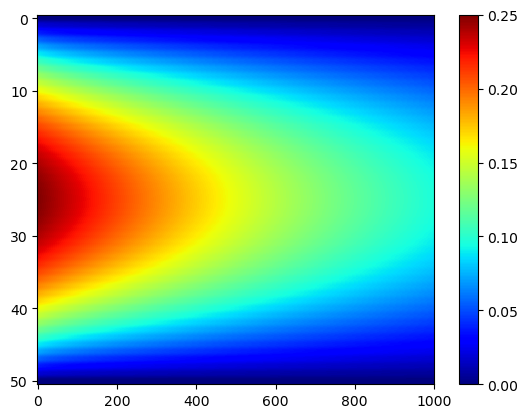

In [8]:
alpha = 0.1
L = 1
f = lambda x: x*(1 - x)
T0 = 0
TL = 0
tf = 1
N = 50
M = 1000

U = heatFTCSD(alpha,L,f,T0,TL,tf,N,M)

plt.imshow(U,aspect='auto',cmap='jet')
plt.colorbar()
plt.show()

## FTCS with Neumann BCs

### Matrix Equations

Consider Neumann boundary conditions $u_x(0,t) = Q_0$ and $u_x(L,t) = Q_L$. The FTCS finite difference equation at $n=0$ yields

$$
u_{0,k+1} = r u_{-1,k} + (1 - 2r) u_{0,k} + r u_{1,k}
$$

with the "ghost value" $u_{-1,k}$. Use the central difference formula for $u_x(0,t_k) = Q_0$

$$
Q_0 = \frac{u_{1,k} - u_{-1,k}}{2 \Delta x}
$$

Rearrange for $u_{-1,k}$

$$
u_{-1,k} = u_{1,k} - 2 \Delta x Q_0
$$

and substitute into the FTCS equation

$$
u_{0,k+1} = (1 - 2r) u_{0,k} + 2 r u_{1,k} - \frac{2 \alpha^2 \Delta t Q_0}{\Delta x}
$$

Similarly, the boundary condition $u_x(L,t) = Q_L$ yields the equation

$$
u_{N,k+1} = 2r u_{N-1,k} + (1 - 2r)u_{N,k} + \frac{2 \alpha^2 \Delta t Q_L}{\Delta x}
$$

Write out the FTCS equations for $n=1,\dots,N-1$ along with the boundary conditions:

$$
\begin{array}{cccccccccccccc}
u_{0,k+1}   & = & (1 - 2r)u_{0,k} & + & 2r & & & & & & & - \frac{2 \alpha^2 \Delta t Q_0}{\Delta x} \\
u_{1,k+1}   & = & r u_{0,k} & + & (1 - 2r) u_{1,k} & + & r u_{2,k} \\
 & \vdots   & & & & & \ddots \\
u_{N-1,k+1} & = & & & & & r u_{N-2,k}  & +  & (1 - 2r) u_{N-1,k}  & +  & r u_{N,k} \\
u_{N,k+1}   & = & & & & & & & 2r & + & (1 - 2r)u_{N,k} & + \frac{2 \alpha^2 \Delta t Q_L}{\Delta x}
\end{array}
$$

These finite difference equations show us that approximations at time $t_{k+1}$ are given by matrix multiplication of the vector of approximations at time $t_k$. Therefore we can write the FTCS method as an iterative matrix formula.

$$
\boldsymbol{u}_{k+1} = A \boldsymbol{u}_k + \boldsymbol{q}
$$

where

$$
A = 
\left[
\begin{array}{ccccccc}
1 - 2r & 2r & & & & \\
r & 1 - 2r & r & & & & \\
& r & 1 - 2r & r & & & \\
& & & \ddots & & & \\
& & & r & 1 - 2r & r & \\
& & & & r & 1 - 2r & r \\
& & & & & 2r & 1 - 2r
\end{array}
\right]
\hspace{20mm}
\boldsymbol{u}_k = \begin{bmatrix} u_{0,k} \\ u_{1,k} \\ \vdots \\ u_{N-1,k} \\ u_{N,k} \end{bmatrix}
$$

$$
\boldsymbol{q} = \frac{2 \alpha^2 \Delta t}{\Delta x} \begin{bmatrix} -Q_0 \\ 0 \\ \vdots \\ 0 \\ Q_L \end{bmatrix}
\hspace{20mm}
r = \frac{\alpha^2 \Delta t}{\Delta x^2}
$$

The algorithm produces the matrix of approximations

$$
U =  [u_{n,k}] = \begin{bmatrix} & & & \\ \boldsymbol{u}_0 & \boldsymbol{u}_1 & \cdots & \boldsymbol{u}_M \\ & & & \end{bmatrix}
\ \ , \ \ \
u_{n,k} \approx u(x_n,t_k)
$$

starting from the initial condition

$$
\boldsymbol{u}_0 = \begin{bmatrix} u_{0,0} \\ u_{1,0} \\ \vdots \\ u_{N,0} \end{bmatrix}
= \begin{bmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_N) \end{bmatrix}
$$

### Implementation

The function `heatFTCSN` takes input parameters `alpha`, `L`, `f`, `Q0`, `QL`, `tf`, `N` and `M`, and returns the matrix `U` of approximations where:

* `alpha` is the diffusion coefficient in the heat equation $u_t = \alpha^2 u_{xx}$
* `L` is the length of the interval $0 \leq x \leq L$
* `f` is a Python function whcih represents the initial condition $u(x,0) = f(x)$
* `Q0` is the boundary condition $u_x(0,t) = Q_0$
* `QL` is the boundary condition $u_x(L,t) = Q_L$
* `tf` is the length of the interval $0 \leq t \leq t_f$
* `N` is the number of steps in the $x$-direction of the discretization
* `M` is the number of steps in the $t$-direction of the discretization
* `U` is the matrix $U = [u_{n,k}]$ of size $(N+1) \times (M+1)$ of approximations $u_{n,k} \approx u(x_n,t_k)$

In [9]:
def heatFTCSN(alpha,L,f,Q0,QL,tf,N,M):
    dx = L/N
    dt = tf/M
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,M+1))
    U[:,0] = f(x)
    r = alpha*dt/dx**2
    A = np.zeros((N+1,N+1))
    A[0,0] = 1 - 2*r
    A[0,1] = 2*r
    A[N,N] = 1 - 2*r
    A[N,N-1] = 2*r
    for n in range(1,N):
        A[n,n-1] = r
        A[n,n] = 1 - 2*r
        A[n,n+1] = r
    q = np.zeros(N+1)
    q[0] = -2*alpha**2*dt/dx*Q0
    q[N] = 2*alpha**2*dt/dx*QL
    for k in range(M):
        U[:,k+1] = A@U[:,k] + q
    return U

### Example

Consider $\alpha = 0.1$, $L = 1$, $f(x) = x(1-x)$, $Q_0=Q_L=0$ and $t_f = 1$.

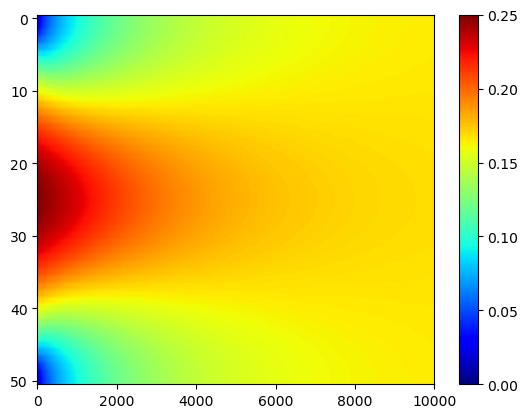

In [19]:
alpha = 0.1
L = 1
f = lambda x: x*(1 - x)
Q0 = 0
QL = 0
tf = 1
N = 50
M = 10000

U = heatFTCSN(alpha,L,f,Q0,QL,tf,N,M)

plt.imshow(U,aspect='auto',cmap='jet'), plt.colorbar()
plt.show()

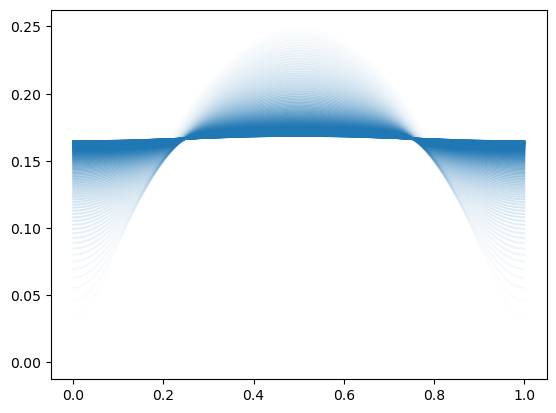

In [28]:
x = np.linspace(0,L,N+1)
nframes = 100
step = M//nframes
for i in range(nframes):
    plt.plot(x,U[:,step*i],'C0',alpha=i/nframes)